In [ ]:
# import libraries
import os
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
import xgboost
from sklearn import svm,tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Input,LSTM,Dense,Bidirectional,Dropout, Activation
from keras.models import Model
from keras.models import Sequential
from keras import regularizers
from keras.optimizers import RMSprop
tf.__version__
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Spam Filter'
data = pd.read_csv(path + '/emails spam detection.csv')

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Spam Filter')
!pwd

/content/drive/MyDrive/Colab Notebooks/Spam Filter


In [ ]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


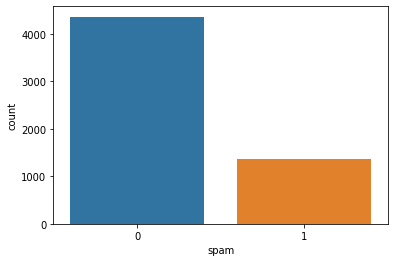

In [ ]:
sns.countplot(x='spam', data=data)

In [ ]:
# checking the number of duplicate columns
data[data.duplicated(subset=None, keep='first') == True].shape[0]

33

In [ ]:
# dropping the duplicate columns
data.drop_duplicates(inplace = True)

In [ ]:
# creating a column with the length of each message
data['word_len'] = data.text.apply(len)

In [ ]:
data.head()

,text,spam,word_len
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [ ]:
# Hightest word count
data.word_len.max()

43952

In [ ]:
# Cleaning the dataset
# ---Punctuations are [!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]
# ---Stop words in natural language processing, are useless words (data).

def process_text(text):
    
    #1 Remove Punctuationa
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2 Remove Stop Words
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3 Return a list of clean words
    return clean_words

In [ ]:
#data.text = data.text.apply(process_text)
data.head()

,text,spam,word_len
0,"[Subject, naturally, irresistible, corporate, ...",1,1484
1,"[Subject, stock, trading, gunslinger, fanny, m...",1,598
2,"[Subject, unbelievable, new, homes, made, easy...",1,448
3,"[Subject, 4, color, printing, special, request...",1,500
4,"[Subject, money, get, software, cds, software,...",1,235


## Test Vectorization

In [ ]:
vocab_size = 10000
max_len = 250

# Tokenize the mails
token = Tokenizer(num_words=vocab_size)
token.fit_on_texts(data.text)

# Use text_to_sequence to convert it into vectors
sequences = token.texts_to_sequences(data.text)

# pad seqence to create a matrix of equal length mails
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, data.spam, test_size = 0.2, random_state = 1)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 200, input_length=max_len))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 250, 200)          2000000   
                                                                 
 bidirectional_6 (Bidirectio  (None, 64)               59648     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,059,713
Trainable params: 2,059,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3)


Epoch 1/3
143/143 [==============================] - 25s 171ms/step - loss: 0.0303 - accuracy: 0.9923 - val_loss: 0.0510 - val_accuracy: 0.9868
Epoch 2/3
143/143 [==============================] - 26s 181ms/step - loss: 0.0116 - accuracy: 0.9967 - val_loss: 0.0366 - val_accuracy: 0.9912
Epoch 3/3
143/143 [==============================] - 27s 186ms/step - loss: 0.0071 - accuracy: 0.9976 - val_loss: 0.0369 - val_accuracy: 0.9903


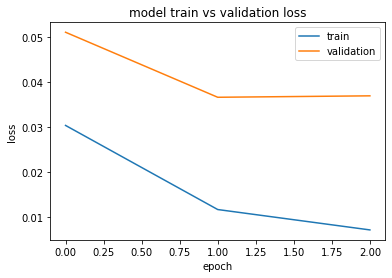

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

In [ ]:
 model.save('spam_model.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict_classes(X_test)


AttributeError: ignored

In [ ]:
scores

[0.6936565637588501, 0.521510124206543]